In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


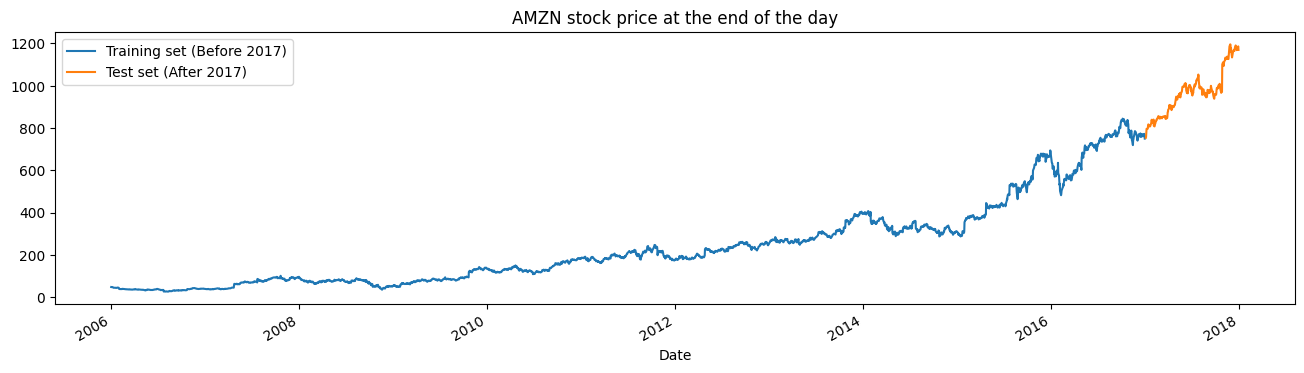

In [3]:
import matplotlib.pyplot as plt
df['Close'][:'2016'].plot(figsize=(16, 4), legend=True)
df['Close']['2017':].plot(figsize=(16, 4), legend=True)

plt.legend(['Training set (Before 2017)', 'Test set (After 2017)'])
plt.title('AMZN stock price at the end of the day')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Filter only the 'Close' feature
df = df.filter(['Close'])
# Scale the 'Close' values in the range [0,1]
mmscaler = MinMaxScaler(feature_range=(0,1))
mmscaler.fit(df.Close.values.reshape(-1,1))
scaled_data = mmscaler.transform(df.values)
# Deciding the split point to be at year 2016
split_point = len(df[:'2016'])

In [6]:
import numpy as np

WIN_SIZE = 60

train_data = scaled_data[:split_point, :]
x_train = []
y_train = []

# Creating the basic data structure
for i in range(WIN_SIZE, len(train_data)):
    x_train.append(train_data[i-WIN_SIZE:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
# Sequences in input to the LSTM
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
# Final output constiting of a single neuron for numerical value prediction
model.add(Dense(1))

c:\Users\admin\diajeng\ta\learn_lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0011
Epoch 2/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 3.5107e-04
Epoch 3/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 3.2864e-04
Epoch 4/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.6249e-04
Epoch 5/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.1033e-04
Epoch 6/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8.3000e-05
Epoch 7/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.2161e-04
Epoch 8/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8.6859e-05
Epoch 9/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.4185e-04
Epoch 10/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 8.4462e-05
Epoch 11/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 6.6282e-05
Epoch 12/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 5.9285e-05
Epoch 13/20
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 6.5296e-05
Epoch 14/20
2708/2708 ━━━━━━━━━━━━━━━━

In [10]:
test_data = scaled_data[len(train_data) - 60:, :]
x_test = []
y_test = test_data
for i in range(WIN_SIZE, len(test_data)):
    x_test.append(test_data[i-WIN_SIZE:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = mmscaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_17984\1160914545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


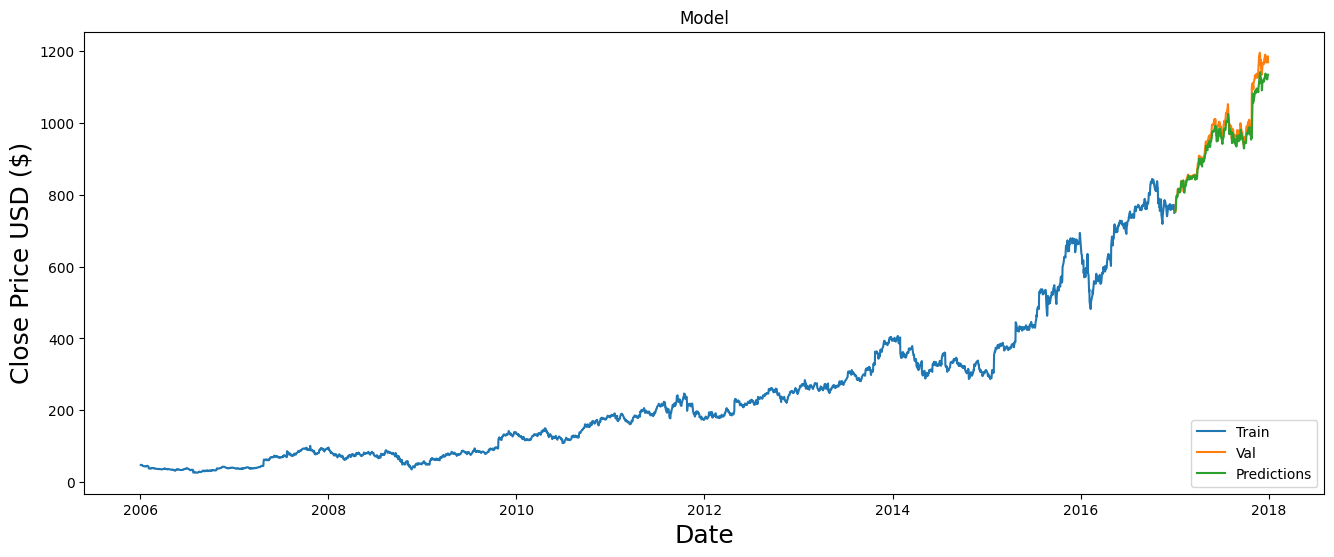

In [11]:

# Plot the data
train = df[:split_point]
valid = df[split_point:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
print(predictions)

[[ 753.11847]
 [ 757.55035]
 [ 763.1139 ]
 [ 783.6755 ]
 [ 798.30115]
 [ 796.78094]
 [ 794.55566]
 [ 798.94025]
 [ 813.69995]
 [ 817.1646 ]
 [ 808.35065]
 [ 806.30176]
 [ 809.81903]
 [ 809.5339 ]
 [ 817.7301 ]
 [ 822.6418 ]
 [ 834.6636 ]
 [ 837.40985]
 [ 832.8886 ]
 [ 828.1612 ]
 [ 822.88806]
 [ 831.6966 ]
 [ 839.8826 ]
 [ 810.8166 ]
 [ 805.9526 ]
 [ 815.7799 ]
 [ 822.3851 ]
 [ 821.7977 ]
 [ 826.5177 ]
 [ 835.6691 ]
 [ 835.30084]
 [ 839.8863 ]
 [ 842.18713]
 [ 842.6381 ]
 [ 853.1784 ]
 [ 853.19336]
 [ 848.4191 ]
 [ 842.53046]
 [ 846.5363 ]
 [ 844.3334 ]
 [ 850.60535]
 [ 847.57983]
 [ 847.15405]
 [ 844.9956 ]
 [ 844.3731 ]
 [ 848.8255 ]
 [ 851.3242 ]
 [ 850.09235]
 [ 851.79193]
 [ 850.4256 ]
 [ 850.49536]
 [ 851.28015]
 [ 850.26013]
 [ 854.3738 ]
 [ 842.1096 ]
 [ 845.238  ]
 [ 847.1287 ]
 [ 844.4036 ]
 [ 845.0116 ]
 [ 854.04065]
 [ 871.0568 ]
 [ 872.1286 ]
 [ 879.0566 ]
 [ 884.97235]
 [ 898.53625]
 [ 901.05743]
 [ 889.4515 ]
 [ 886.5673 ]
 [ 900.26166]
 [ 896.81104]
 [ 888.3971 ]
 [ 878